In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

# import autotime
%load_ext autoreload
%autoreload 2
# %load_ext autotime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
df = pd.read_csv('data/credit_risk_dataset.csv')

In [19]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [34]:
import pandas as pd
from pandas.api.types import is_numeric_dtype

from libs.Features import *
from libs.AttributeRelevance import *

In [35]:
feat_income = ContinuousFeature(df, 'person_income', 'loan_status')

In [37]:
feat_income

In [40]:
feat_income.df_lite.bin.value_counts()

60000.000    4978
40337.714    4773
3999.999     4749
98725.714    4655
50000.000    4644
31000.000    4560
75000.000    4222
Name: bin, dtype: int64

In [54]:
iv = IV(target_var = 'loan_status')

In [55]:
iv.group_by_feature(feat_income)

,person_income,count,good,bad
0,3999.999,4749,2174,2575
1,31000.000,4560,1324,3236
2,40337.714,4773,1005,3768
3,50000.000,4644,918,3726
4,60000.000,4978,773,4205
5,75000.000,4222,505,3717
6,98725.714,4655,409,4246


In [58]:
iv_df, iv_value = iv.calculate_iv(feat_income)
display(iv_df)
print('Information value: ', iv_value)

,person_income,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,3999.999,4749,2174,2575,0.305853,0.101087,0.204765,1.107117,0.226699
1,31000.000,4560,1324,3236,0.186269,0.127036,0.059233,0.382718,0.022669
2,40337.714,4773,1005,3768,0.141390,0.147921,-0.006531,-0.045159,0.000295
3,50000.000,4644,918,3726,0.129150,0.146273,-0.017122,-0.124495,0.002132
4,60000.000,4978,773,4205,0.108751,0.165077,-0.056326,-0.417352,0.023508
5,75000.000,4222,505,3717,0.071047,0.145919,-0.074873,-0.719716,0.053887
6,98725.714,4655,409,4246,0.057541,0.166686,-0.109145,-1.063619,0.116089


Information value:  0.4452789325193811


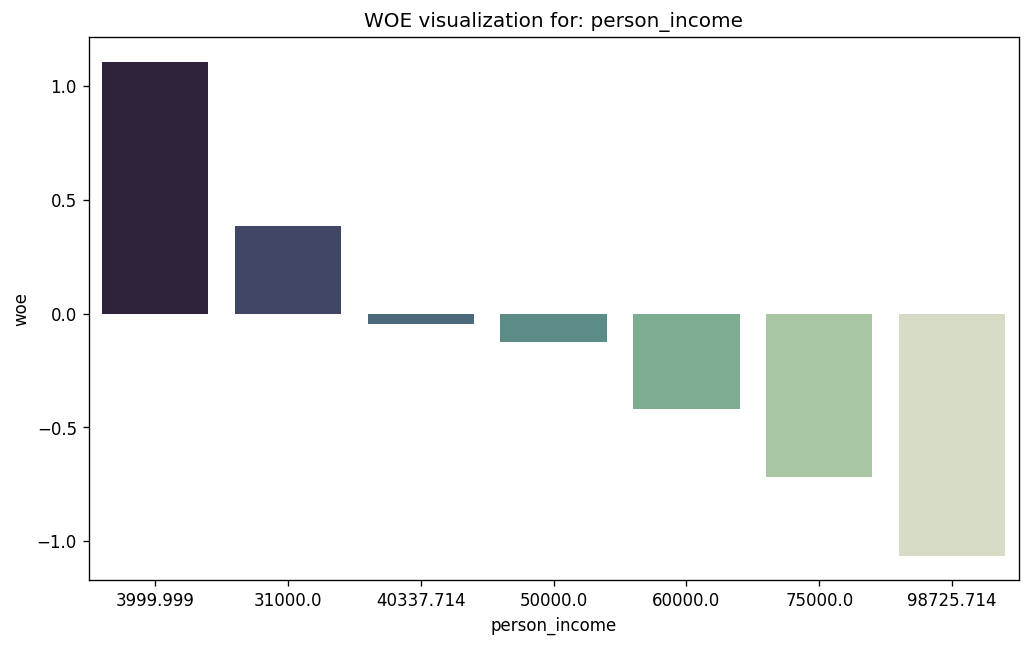

In [59]:
iv.draw_woe(feat_income)

# Statistical Significance Class

In [62]:
s = StatsSignificance(target_var = 'loan_status')

In [63]:
p_value, effect_size = s.calculate_chi(feat_income)
print('p-value: %0.2f' % p_value)
print('effect size: %0.2f' % effect_size)

p-value: 0.00
effect size: 0.28


In [64]:
ar = AttributeRelevance()

In [84]:
feats_dict = {}

for col in [c for c in df.columns if c != 'loan_status']:
    if is_numeric_dtype(df[col]):
        feats_dict[col] = ContinuousFeature(df, col, target_var = 'loan_status')
    else:
        feats_dict[col] = CategoricalFeature(df, col, target_var = 'loan_status')

feats = list(feats_dict.values())

In [85]:
feats

In [91]:
ar.bulk_iv(feats, iv).sort_values(by = 'iv', ascending = False)

,iv
loan_grade,0.881736
loan_int_rate,0.665213
loan_percent_income,0.612035
person_income,0.445279
person_home_ownership,0.376998
cb_person_default_on_file,0.164011
bin,0.164011
loan_intent,0.095752
person_emp_length,0.063837
loan_amnt,0.033564


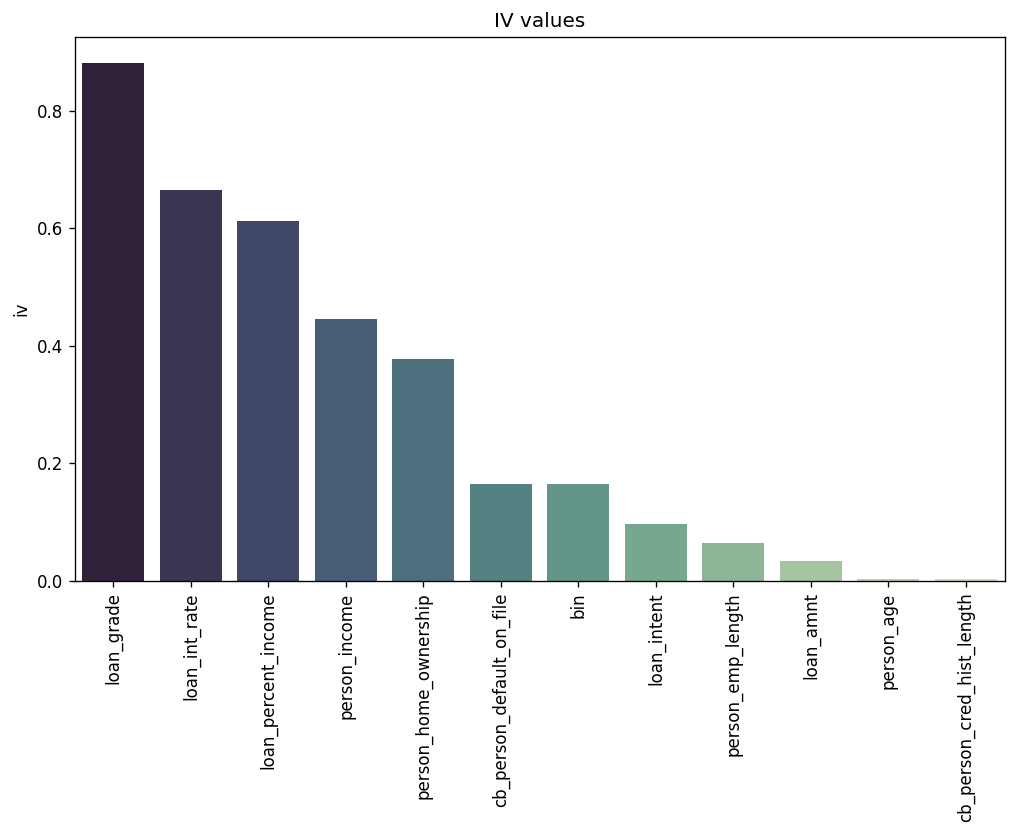

In [92]:
ar.draw_iv(feats, iv)

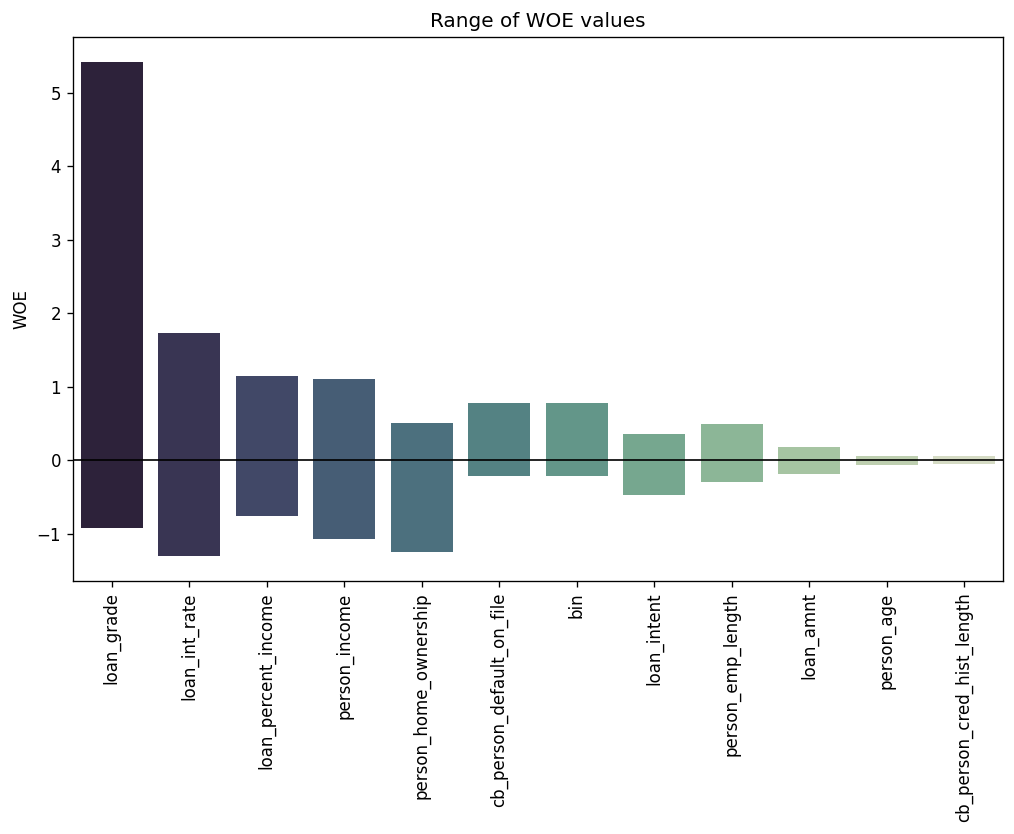

In [93]:
ar.draw_woe_extremes(feats, iv)

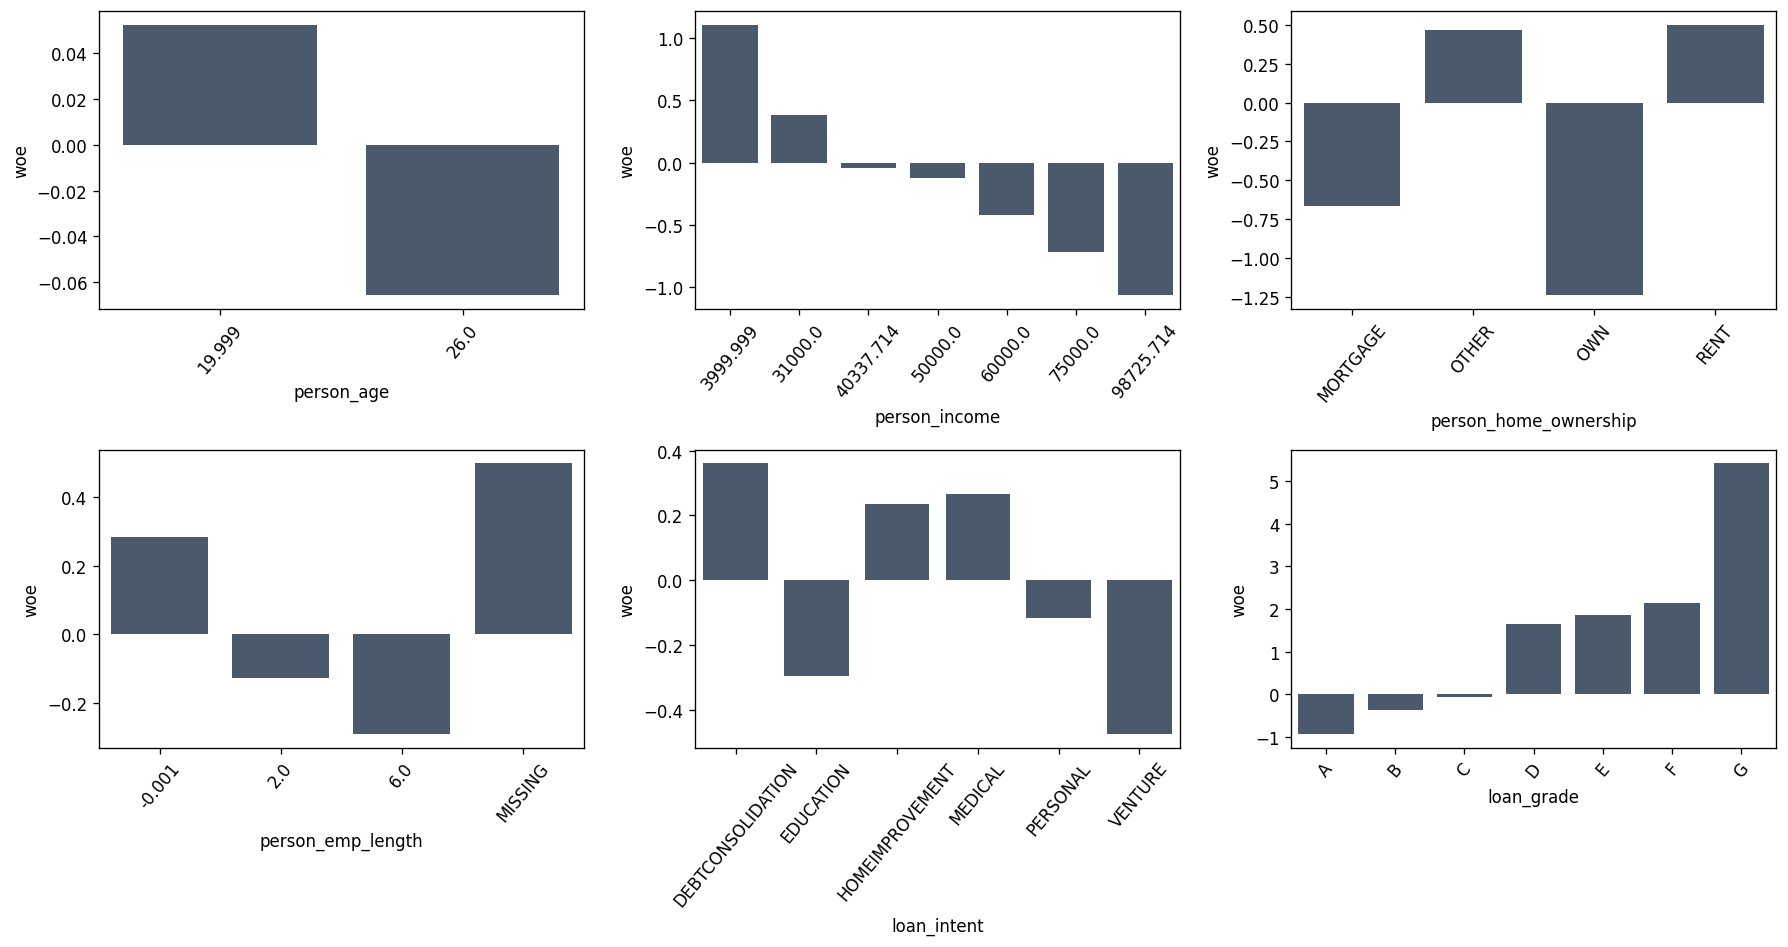

In [94]:
ar.draw_woe_multiplot(feats[:6], iv)

In [96]:
ar.analyze(feats, iv, interpretation=True)

,iv,iv_interpretation
loan_grade,0.881736,suspicious
loan_int_rate,0.665213,suspicious
loan_percent_income,0.612035,suspicious
person_income,0.445279,strong
person_home_ownership,0.376998,strong
cb_person_default_on_file,0.164011,medium
bin,0.164011,medium
loan_intent,0.095752,weak
person_emp_length,0.063837,weak
loan_amnt,0.033564,weak


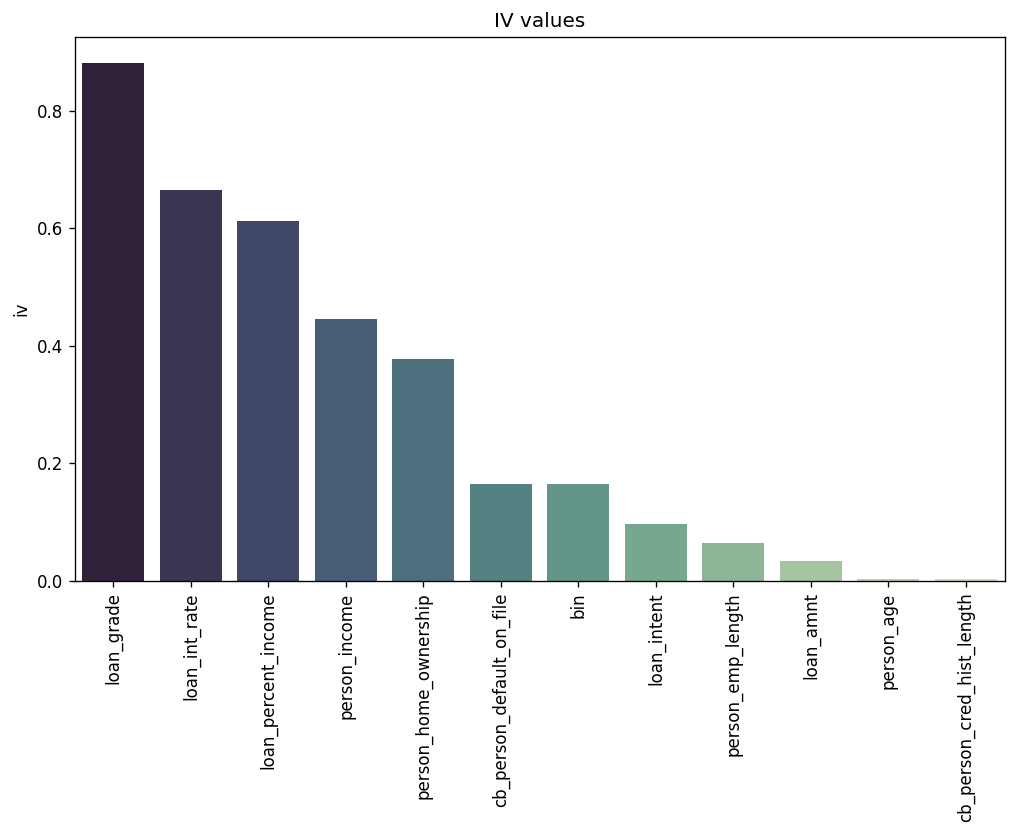

In [97]:
ar.draw_iv(feats, iv)